# Lending Club Case Study

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import datetime as dt

## Below is the loan csv file which has all the information.

In [2]:
df = pd.read_csv("E:\ML&AI\Lending Group Case Study\loan.csv", low_memory=False)
df = pd.DataFrame(df)

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Understanding

In [19]:
#Information about loan table.

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  38577
Columns  :  24

Missing values :   1730

Unique values :  
 id                      38577
member_id               38577
loan_amnt                 870
funded_amnt              1019
funded_amnt_inv          8050
term                        2
int_rate                  370
installment             15022
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              5
annual_inc               5215
verification_status         3
issue_d                    55
loan_status                 2
purpose                    14
zip_code                  822
addr_state                 50
dti                      2853
acc_now_delinq              1
pub_rec_bankruptcies        3
issue_d_month              12
issue_d_year                5
dtype: int64


## Below are some columns with explanation for it.

1. Term : Tenure of loan which can be 36 or 70 month.

2. Grade : Grade assigned by LC as A,B,C,D,E,F,G which increases the interest rate from A to G.

3. Sub_grade : Subgrade is subgrade of each grade as A1,A2,A3,A4,A5, same for B to G. A1-A5 has interest from 8-11%, B1-B5 has 13-16%, C1-C5 has 17-21%, D1-D5 has 22-31%, E1-E5 has 28-29%, F1-F5 has 29-30%, G1-G5 has 30-31%.
Source used for it (https://www.lendingclub.com/foliofn/rateDetail.action)

4. Verification_status : Income source is verified or not

5. Issue_d : Loan funded date

6. Title : Loan Reason tilte

7. Purpose : Reason for loan in brief

8. Desc : Description of reason for loan

9. Initial_list_status : -W, F

Now we will remove the rows which has Loan_status = "Current" because current borrowers cannot be used to identify if they can defaulted or not as they already paying the loan and has 50-50 chances of either paying or not paying the next installment. So we cannot use that data.

In [5]:
#dropping the current loan_status rows

df.drop(df[df['loan_status'] == "Current"].index, inplace = True)
print(pd.unique(df['loan_status']))

['Fully Paid' 'Charged Off']


# Data Cleaning

In [6]:
#Removing the columns which have null values
df = df.dropna(axis = 1, how = 'all')
print ("Columns  : " ,df.shape[1])

Columns  :  56


In [7]:
#Removing the rows which has null values
df = df.dropna(axis = 0, how = 'all')
print ("Rows  : " ,df.shape[0])

Rows  :  38577


In [8]:
#Finding the duplicates
duplicate = df[df.duplicated()]
print(duplicate)

#We don't have any duplicates in data

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

[0 rows x 56 columns]


In [9]:
#Finding the null values
print(df.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2386
emp_length                     1033
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12527
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [10]:
#Removing the columns related to the data of current borrower,borrower which is not either fully paid all or the defaulted.

df.drop(['delinq_2yrs',
'earliest_cr_line',
'inq_last_6mths',
'open_acc',
'pub_rec',
'revol_bal',
'revol_util',
'total_acc',
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'last_credit_pull_d',
'application_type',
'collections_12_mths_ex_med',
'pymnt_plan',
'url',
'desc',
'title',
'emp_title',
'chargeoff_within_12_mths',
'delinq_amnt',
'tax_liens',
'policy_code',
'initial_list_status',
'mths_since_last_delinq',
'mths_since_last_record'],axis=1, inplace=True)
print ("Columns  : " ,df.shape[1])

Columns  :  22


In [11]:
#Check the % of NULL values in pending columns and will remove the rows having more than 80% NULL values

print((df.isnull().sum()/len(df))*100)


id                      0.000000
member_id               0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
acc_now_delinq          0.000000
pub_rec_bankruptcies    1.806776
dtype: float64


# Data Analysis

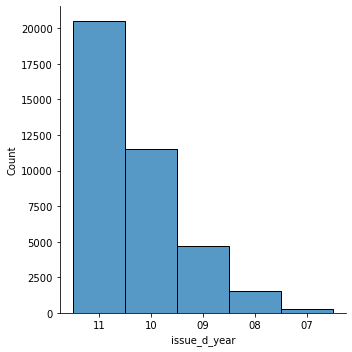

In [12]:
#Number of Loans taken in years

df['issue_d_month'] = df['issue_d'].str.slice(0,3)
df['issue_d_year'] = df['issue_d'].str.slice(-2,)

sns.displot(df, x="issue_d_year")


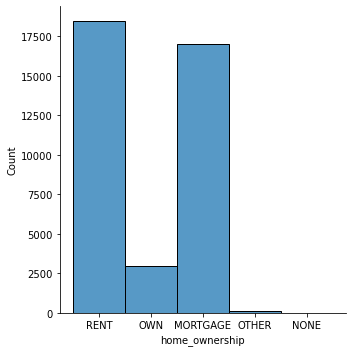

In [13]:
#Count of different home ownerships

sns.displot(df, x="home_ownership")

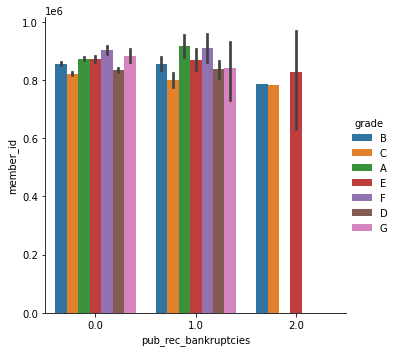

In [14]:
#Member Id's with public record for bankrupties with grades. 

sns.catplot(data=df, x="pub_rec_bankruptcies", y="member_id", kind="bar", hue="grade")

In [15]:
#sns.catplot(data=df, x="member_id", y="dti")

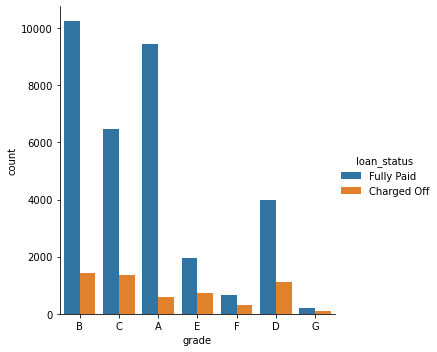

In [17]:
sns.catplot(data=df, x="grade", kind="count", hue="loan_status")

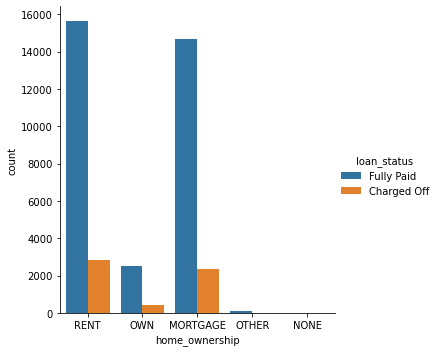

In [18]:
sns.catplot(data=df, x="home_ownership", kind="count", hue="loan_status")

# Recommendations


-> While giving the loan or verifying the borrower we should consider the rejected data as well like when was the last time borrower applied for the loan. So rejected data also should be in the dataset.

-> Borrower should have at least 6 months of experience and source verified which can decrease the risk of not paying the loan. 